# Análisis Climático – El Simbolar, Córdoba
Autor: Gabriel Correa  
Objetivo: análisis climático aplicado a decisiones agrícolas


In [2]:
import os
os.getcwd()

'c:\\Users\\Usuario\\Documents\\analisis_clima_simbolar\\notebooks'

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [4]:
# Parámetros de tiempo
fecha_inicio = datetime(2023, 1, 1)
fecha_fin = datetime(2023, 12, 31)

fechas = pd.date_range(
    start=fecha_inicio,
    end=fecha_fin,
    freq="H"  # datos horarios
)

len(fechas)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13332\2570426499.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range(


8737

In [5]:
# Temperatura base con estacionalidad
temp_base = 18
amplitud = 10

temperatura = (
    temp_base
    + amplitud * np.sin(2 * np.pi * fechas.dayofyear / 365)
    + np.random.normal(0, 1.5, len(fechas))
)

In [6]:
humedad = (
    70
    - 0.5 * temperatura
    + np.random.normal(0, 5, len(fechas))
)

humedad = np.clip(humedad, 20, 100)

In [7]:
df_clima = pd.DataFrame({
    "timestamp": fechas,
    "temperatura_c": temperatura.round(2),
    "humedad_pct": humedad.round(2)
})

df_clima.head()

,timestamp,temperatura_c,humedad_pct
0,2023-01-01 00:00:00,19.91,60.47
1,2023-01-01 01:00:00,20.56,63.96
2,2023-01-01 02:00:00,16.73,58.58
3,2023-01-01 03:00:00,18.03,48.90
4,2023-01-01 04:00:00,20.03,65.44


In [8]:
output_path = "../data/raw/clima_simbolar_2023.csv"
df_clima.to_csv(output_path, index=False)

output_path

'../data/raw/clima_simbolar_2023.csv'

In [9]:
import pandas as pd

ruta = "../data/raw/clima_simbolar_2023.csv"
df = pd.read_csv(ruta)

df.head()

,timestamp,temperatura_c,humedad_pct
0,2023-01-01 00:00:00,19.91,60.47
1,2023-01-01 01:00:00,20.56,63.96
2,2023-01-01 02:00:00,16.73,58.58
3,2023-01-01 03:00:00,18.03,48.90
4,2023-01-01 04:00:00,20.03,65.44


In [10]:
df.shape

(8737, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      8737 non-null   object 
 1   temperatura_c  8737 non-null   float64
 2   humedad_pct    8737 non-null   float64
dtypes: float64(2), object(1)
memory usage: 204.9+ KB


In [12]:
df.describe()

,temperatura_c,humedad_pct
count,8737.000000,8737.000000
mean,18.002920,61.000658
std,7.231258,6.188657
min,3.420000,39.480000
25%,11.160000,56.740000
50%,17.970000,60.960000
75%,24.850000,65.250000
max,32.800000,84.490000


In [13]:
df.tail()

,timestamp,temperatura_c,humedad_pct
8732,2023-12-30 20:00:00,20.44,57.91
8733,2023-12-30 21:00:00,15.74,61.15
8734,2023-12-30 22:00:00,17.95,62.42
8735,2023-12-30 23:00:00,17.89,54.03
8736,2023-12-31 00:00:00,18.05,65.96


In [14]:
df.sample(5)

,timestamp,temperatura_c,humedad_pct
4004,2023-06-16 20:00:00,20.99,54.88
4965,2023-07-26 21:00:00,12.94,70.47
3914,2023-06-13 02:00:00,21.29,54.04
1021,2023-02-12 13:00:00,22.29,59.05
6746,2023-10-09 02:00:00,8.57,69.99


In [15]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      8737 non-null   datetime64[ns]
 1   temperatura_c  8737 non-null   float64       
 2   humedad_pct    8737 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 204.9 KB


In [16]:
df["timestamp"].min(), df["timestamp"].max()

(Timestamp('2023-01-01 00:00:00'), Timestamp('2023-12-31 00:00:00'))

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df = df.set_index("timestamp")
df.head()

,temperatura_c,humedad_pct
timestamp,,
2023-01-01 00:00:00,19.91,60.47
2023-01-01 01:00:00,20.56,63.96
2023-01-01 02:00:00,16.73,58.58
2023-01-01 03:00:00,18.03,48.90
2023-01-01 04:00:00,20.03,65.44


In [19]:
df["temperatura_c"].head()

timestamp
2023-01-01 00:00:00    19.91
2023-01-01 01:00:00    20.56
2023-01-01 02:00:00    16.73
2023-01-01 03:00:00    18.03
2023-01-01 04:00:00    20.03
Name: temperatura_c, dtype: float64

In [20]:
df[["temperatura_c", "humedad_pct"]].head()

,temperatura_c,humedad_pct
timestamp,,
2023-01-01 00:00:00,19.91,60.47
2023-01-01 01:00:00,20.56,63.96
2023-01-01 02:00:00,16.73,58.58
2023-01-01 03:00:00,18.03,48.90
2023-01-01 04:00:00,20.03,65.44


In [21]:
df.loc["2023-01-15"]

,temperatura_c,humedad_pct
timestamp,,
2023-01-15 00:00:00,22.06,57.22
2023-01-15 01:00:00,20.93,50.72
2023-01-15 02:00:00,22.53,58.24
2023-01-15 03:00:00,19.18,57.80
2023-01-15 04:00:00,21.82,60.28
2023-01-15 05:00:00,21.95,50.37
2023-01-15 06:00:00,20.88,54.96
2023-01-15 07:00:00,19.79,61.48
2023-01-15 08:00:00,21.31,53.43


In [22]:
df.loc["2023-06-01":"2023-06-07"]

,temperatura_c,humedad_pct
timestamp,,
2023-06-01 00:00:00,22.61,47.61
2023-06-01 01:00:00,23.08,60.64
2023-06-01 02:00:00,22.55,53.39
2023-06-01 03:00:00,24.64,58.86
2023-06-01 04:00:00,21.86,62.89
...,...,...
2023-06-07 19:00:00,20.25,51.31
2023-06-07 20:00:00,19.71,64.15
2023-06-07 21:00:00,23.09,58.20


In [23]:
df[df["temperatura_c"] > 30]

,temperatura_c,humedad_pct
timestamp,,
2023-02-21 05:00:00,30.65,48.98
2023-02-27 12:00:00,30.04,51.02
2023-02-28 11:00:00,30.43,50.29
2023-03-05 17:00:00,30.34,62.75
2023-03-07 00:00:00,31.02,52.95
...,...,...
2023-05-01 04:00:00,31.14,45.50
2023-05-02 20:00:00,30.16,64.00
2023-05-03 19:00:00,30.85,50.55


In [24]:
df[df["humedad_pct"] < 30]

,temperatura_c,humedad_pct
timestamp,,


In [25]:
df[
    (df["temperatura_c"] > 30) &
    (df["humedad_pct"] < 40)
]

,temperatura_c,humedad_pct
timestamp,,


In [26]:
df.sort_values("temperatura_c", ascending=False).head()

,temperatura_c,humedad_pct
timestamp,,
2023-03-31 15:00:00,32.80,50.90
2023-04-09 06:00:00,32.60,54.71
2023-03-23 05:00:00,32.42,53.86
2023-03-17 08:00:00,32.34,59.49
2023-03-21 15:00:00,32.23,51.79


In [27]:
df["temperatura_c"].mean()

np.float64(18.002919766510246)

In [28]:
df[["temperatura_c", "humedad_pct"]].corr()

,temperatura_c,humedad_pct
temperatura_c,1.000000,-0.581686
humedad_pct,-0.581686,1.000000


In [29]:
df_diario = df.resample("D").mean()
df_diario.head()

,temperatura_c,humedad_pct
timestamp,,
2023-01-01,18.465417,60.815417
2023-01-02,17.785000,61.652500
2023-01-03,18.183333,60.408333
2023-01-04,18.847083,60.194167
2023-01-05,19.634583,59.694583


In [30]:
df_mensual = df.resample("M").mean()
df_mensual

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13332\2080885955.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df.resample("M").mean()


,temperatura_c,humedad_pct
timestamp,,
2023-01-31,20.749207,59.589960
2023-02-28,24.927560,57.574658
2023-03-31,27.545417,56.200108
2023-04-30,27.591583,56.202611
2023-05-31,25.067151,57.615954
2023-06-30,20.678667,59.701736
2023-07-31,15.496761,62.166519
2023-08-31,10.988710,64.692890
2023-09-30,8.482847,65.646528


In [31]:
df_mensual = df.resample("ME").mean()
df_mensual

,temperatura_c,humedad_pct
timestamp,,
2023-01-31,20.749207,59.589960
2023-02-28,24.927560,57.574658
2023-03-31,27.545417,56.200108
2023-04-30,27.591583,56.202611
2023-05-31,25.067151,57.615954
2023-06-30,20.678667,59.701736
2023-07-31,15.496761,62.166519
2023-08-31,10.988710,64.692890
2023-09-30,8.482847,65.646528


In [32]:
df["temp_media_24h"] = df["temperatura_c"].rolling(24).mean()
df.head(30)

,temperatura_c,humedad_pct,temp_media_24h
timestamp,,,
2023-01-01 00:00:00,19.91,60.47,NaN
2023-01-01 01:00:00,20.56,63.96,NaN
2023-01-01 02:00:00,16.73,58.58,NaN
2023-01-01 03:00:00,18.03,48.90,NaN
2023-01-01 04:00:00,20.03,65.44,NaN
2023-01-01 05:00:00,17.96,65.06,NaN
2023-01-01 06:00:00,17.34,57.53,NaN
2023-01-01 07:00:00,17.84,59.17,NaN
2023-01-01 08:00:00,17.08,63.01,NaN


In [33]:
df["alerta_calor"] = df["temperatura_c"] > 35
df[["temperatura_c", "alerta_calor"]].sample(10)

,temperatura_c,alerta_calor
timestamp,,
2023-09-26 16:00:00,10.05,False
2023-12-18 16:00:00,16.52,False
2023-03-09 19:00:00,30.07,False
2023-03-11 00:00:00,28.04,False
2023-09-09 05:00:00,9.02,False
2023-11-12 14:00:00,10.46,False
2023-06-24 21:00:00,21.63,False
2023-04-12 15:00:00,27.76,False
2023-02-23 22:00:00,25.85,False


In [34]:
df.query("temperatura_c > 30")

,temperatura_c,humedad_pct,temp_media_24h,alerta_calor
timestamp,,,,
2023-02-21 05:00:00,30.65,48.98,25.912500,False
2023-02-27 12:00:00,30.04,51.02,26.246250,False
2023-02-28 11:00:00,30.43,50.29,26.299583,False
2023-03-05 17:00:00,30.34,62.75,26.927917,False
2023-03-07 00:00:00,31.02,52.95,26.987500,False
...,...,...,...,...
2023-05-01 04:00:00,31.14,45.50,26.595000,False
2023-05-02 20:00:00,30.16,64.00,26.867917,False
2023-05-03 19:00:00,30.85,50.55,27.023333,False


In [35]:
df.query("temperatura_c > 30 and humedad_pct < 40")

,temperatura_c,humedad_pct,temp_media_24h,alerta_calor
timestamp,,,,


In [36]:
df.eval(
    "indice_confort = temperatura_c - (0.55 - 0.0055 * humedad_pct) * (temperatura_c - 14.5)",
    inplace=True
)

df[["temperatura_c", "humedad_pct", "indice_confort"]].head()

,temperatura_c,humedad_pct,indice_confort
timestamp,,,
2023-01-01 00:00:00,19.91,60.47,18.733785
2023-01-01 01:00:00,20.56,63.96,19.358787
2023-01-01 02:00:00,16.73,58.58,16.221984
2023-01-01 03:00:00,18.03,48.90,17.037893
2023-01-01 04:00:00,20.03,65.44,18.978858


In [37]:
df["mes"] = df.index.month

In [38]:
df.groupby("mes")["temperatura_c"].mean()

mes
1     20.749207
2     24.927560
3     27.545417
4     27.591583
5     25.067151
6     20.678667
7     15.496761
8     10.988710
9      8.482847
10     8.437769
11    11.117167
12    15.408530
Name: temperatura_c, dtype: float64

In [39]:
df.groupby("mes").agg({
    "temperatura_c": ["mean", "min", "max"],
    "humedad_pct": ["mean", "min", "max"]
})

temperatura_c               humedad_pct              
             mean    min    max        mean    min    max
mes                                                      
1       20.749207  15.36  26.34   59.589960  42.58  73.66
2       24.927560  19.59  30.65   57.574658  44.80  70.65
3       27.545417  22.86  32.80   56.200108  42.40  72.31
4       27.591583  23.31  32.60   56.202611  39.48  71.80
5       25.067151  18.76  31.14   57.615954  42.33  72.84
6       20.678667  14.93  27.78   59.701736  42.58  75.73
7       15.496761   8.09  20.99   62.166519  47.54  77.43
8       10.988710   5.66  16.41   64.692890  49.23  84.49
9        8.482847   3.42  13.73   65.646528  48.22  79.77
10       8.437769   3.43  12.97   65.867003  48.10  81.89
11      11.117167   6.49  16.91   64.127569  45.35  82.20
12      15.408530   9.58  21.31   62.387753  47.19  79.66

In [40]:
def estacion(mes):
    if mes in [12, 1, 2]:
        return "Verano"
    elif mes in [3, 4, 5]:
        return "Otoño"
    elif mes in [6, 7, 8]:
        return "Invierno"
    else:
        return "Primavera"

df["estacion"] = df.index.month.map(estacion)

In [41]:
df.groupby("estacion")[["temperatura_c", "humedad_pct"]].mean()

,temperatura_c,humedad_pct
estacion,,
Invierno,15.667495,62.214062
Otoño,26.725403,56.678003
Primavera,9.335948,65.220879
Verano,20.261245,59.900173


In [42]:
df.query("temperatura_c > 35").shape[0]

0

In [43]:
df.query("temperatura_c > 35").groupby("estacion").size()

Series([], dtype: int64)

In [44]:
df["temp_media_mes"] = (
    df.groupby("mes")["temperatura_c"]
    .transform("mean")
)

df["desvio_temp_mes"] = df["temperatura_c"] - df["temp_media_mes"]

In [45]:
df["evento_calor"] = df["temperatura_c"] > 35
df["evento_frio"] = df["temperatura_c"] < 5

In [46]:
df_raw = df.copy()
df = df.copy()

In [47]:
np.random.seed(42)

idx_nan = np.random.choice(df.index, size=200, replace=False)
df.loc[idx_nan, "temperatura_c"] = np.nan

In [48]:
idx_err = np.random.choice(df.index, size=50, replace=False)
df.loc[idx_err, "humedad_pct"] = -10

In [49]:
idx_out = np.random.choice(df.index, size=30, replace=False)
df.loc[idx_out, "temperatura_c"] = 60

In [50]:
df.isna().sum()

temperatura_c      200
humedad_pct          0
temp_media_24h      23
alerta_calor         0
indice_confort       0
mes                  0
estacion             0
temp_media_mes       0
desvio_temp_mes      0
evento_calor         0
evento_frio          0
dtype: int64

In [51]:
(df["humedad_pct"] < 0).sum()

np.int64(50)

In [52]:
df["temperatura_c"].describe()

count    8537.000000
mean       18.166041
std         7.640653
min         3.420000
25%        11.180000
50%        18.030000
75%        24.950000
max        60.000000
Name: temperatura_c, dtype: float64

In [53]:
df.loc[df["humedad_pct"] < 0, "humedad_pct"] = np.nan

In [54]:
df.loc[df["temperatura_c"] > 45, "temperatura_c"] = np.nan
df.loc[df["temperatura_c"] < -30, "temperatura_c"] = np.nan

In [55]:
df["temperatura_c"] = df["temperatura_c"].interpolate(method="time")
df["humedad_pct"] = df["humedad_pct"].interpolate(method="time")

In [56]:
df.isna().sum()

temperatura_c       0
humedad_pct         0
temp_media_24h     23
alerta_calor        0
indice_confort      0
mes                 0
estacion            0
temp_media_mes      0
desvio_temp_mes     0
evento_calor        0
evento_frio         0
dtype: int64

In [57]:
df.describe()

,temperatura_c,humedad_pct,temp_media_24h,indice_confort,mes,temp_media_mes,desvio_temp_mes
count,8737.000000,8737.000000,8714.000000,8737.000000,8737.000000,8737.000000,8.737000e+03
mean,18.001535,61.000105,18.002573,17.108399,6.511617,18.002920,3.903634e-16
std,7.229346,6.181292,7.089181,5.614649,3.441110,6.996669,1.826941e+00
min,3.420000,39.480000,7.230417,5.202495,1.000000,8.437769,-7.406761e+00
25%,11.160000,56.750000,10.901250,11.802103,4.000000,10.988710,-1.229207e+00
50%,17.970000,60.960000,17.837083,17.227646,7.000000,15.496761,2.223118e-02
75%,24.870000,65.250000,24.913750,22.427118,10.000000,25.067151,1.221290e+00
max,32.800000,84.490000,28.699167,28.365159,12.000000,27.591583,7.101333e+00


In [58]:
df["dato_valido"] = (
    df["temperatura_c"].between(-30, 45) &
    df["humedad_pct"].between(0, 100)
)

In [59]:
output_path = "../data/processed/clima_simbolar_2023_clean.csv"
df.to_csv(output_path)

output_path

'../data/processed/clima_simbolar_2023_clean.csv'

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

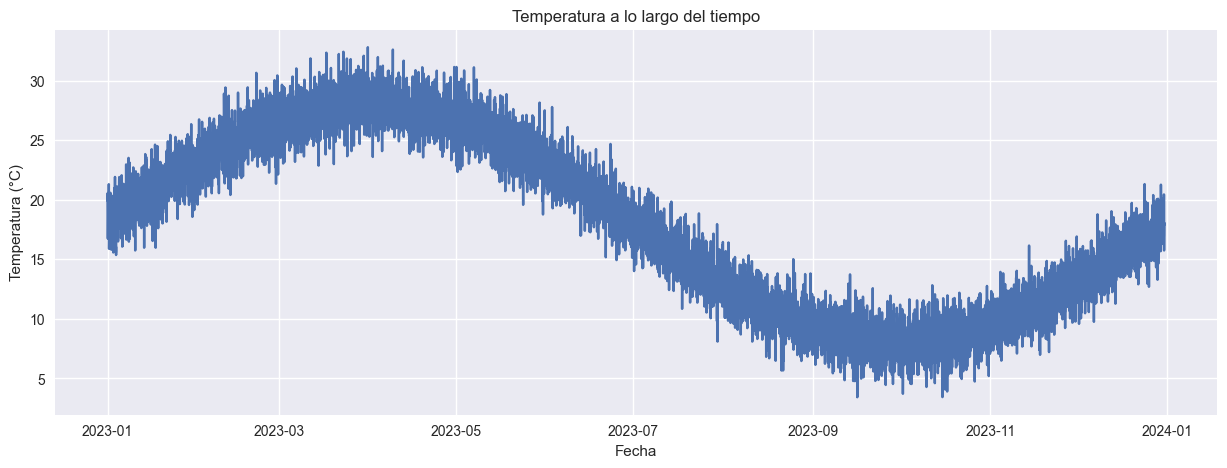

In [61]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["temperatura_c"])
plt.title("Temperatura a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.show()

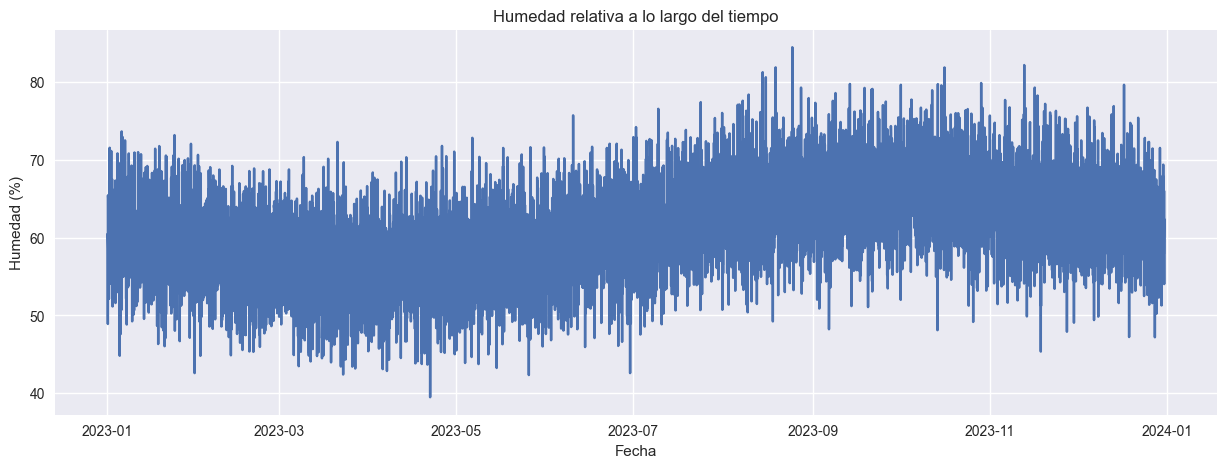

In [62]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["humedad_pct"])
plt.title("Humedad relativa a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Humedad (%)")
plt.show()

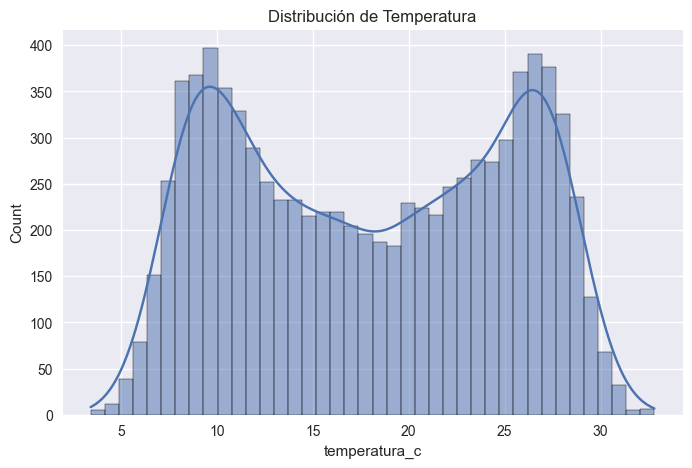

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(df["temperatura_c"], bins=40, kde=True)
plt.title("Distribución de Temperatura")
plt.show()

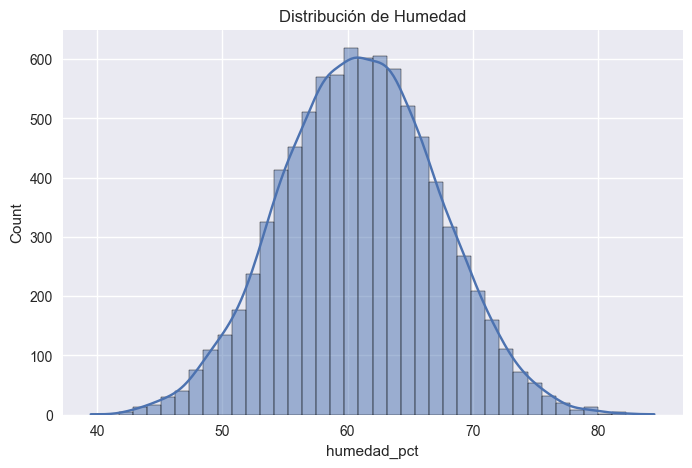

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(df["humedad_pct"], bins=40, kde=True)
plt.title("Distribución de Humedad")
plt.show()

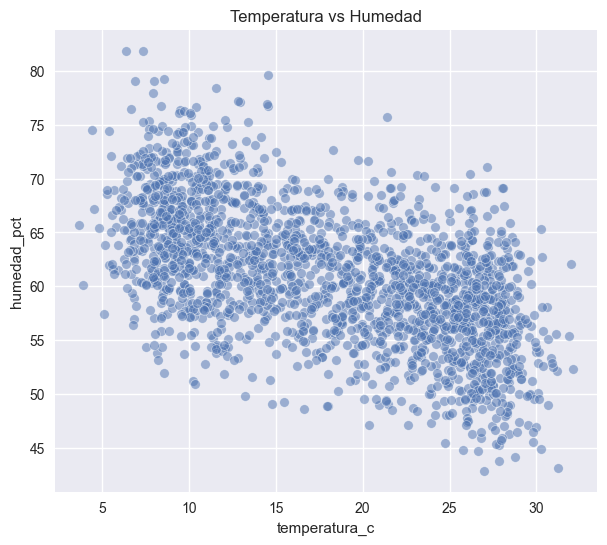

In [65]:
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df.sample(2000),  # sample para performance
    x="temperatura_c",
    y="humedad_pct",
    alpha=0.5
)
plt.title("Temperatura vs Humedad")
plt.show()

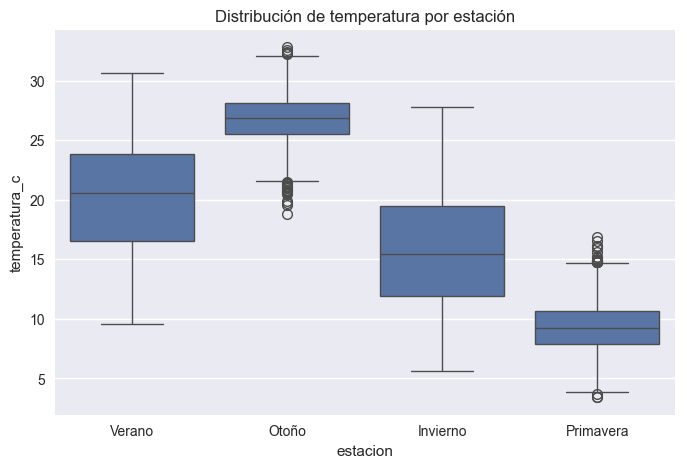

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="estacion", y="temperatura_c")
plt.title("Distribución de temperatura por estación")
plt.show()

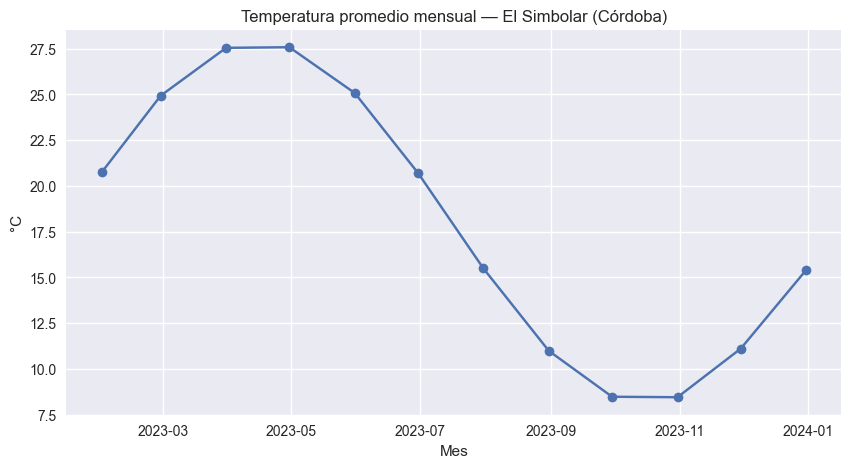

In [71]:
df_mensual = df.resample("ME").mean(numeric_only=True)

plt.figure(figsize=(10, 5))
plt.plot(df_mensual.index, df_mensual["temperatura_c"], marker="o")
plt.title("Temperatura promedio mensual — El Simbolar (Córdoba)")
plt.ylabel("°C")
plt.xlabel("Mes")
plt.show()

In [72]:
import numpy as np

base = 22        # temperatura media anual Córdoba
amplitud = 10   # variación estacional

mes = df.index.month

df["temperatura_c"] = (
    base
    + amplitud * np.cos(2 * np.pi * (mes - 1) / 12)
    + np.random.normal(0, 1.5, size=len(df))
)

<Axes: title={'center': 'Temperatura promedio mensual — El Simbolar (Córdoba)'}, xlabel='timestamp'>

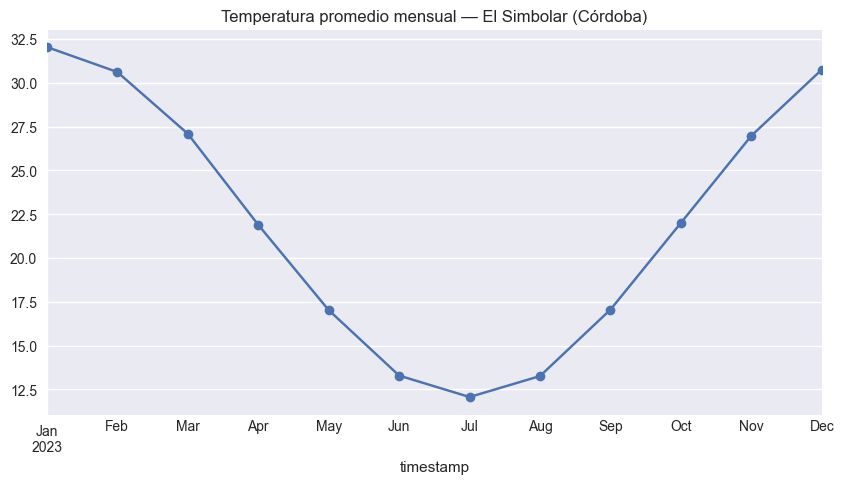

In [73]:
df_mensual = df.resample("ME").mean(numeric_only=True)

df_mensual["temperatura_c"].plot(
    figsize=(10, 5),
    title="Temperatura promedio mensual — El Simbolar (Córdoba)",
    marker="o"
)

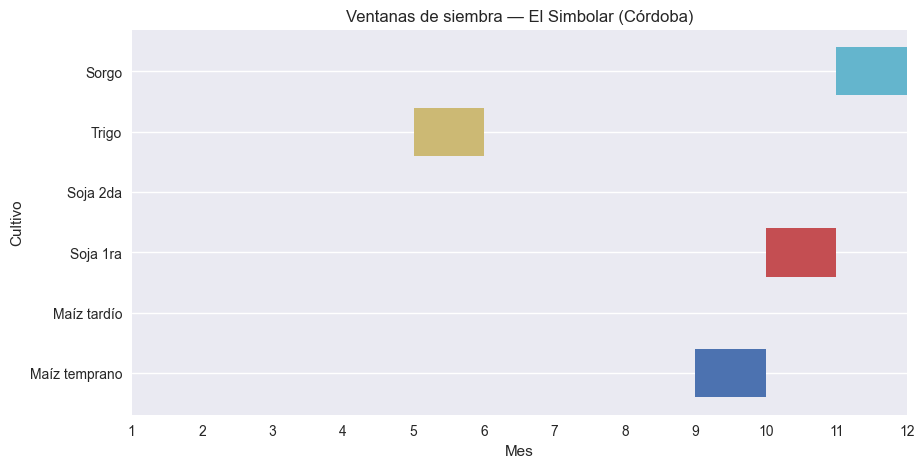

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

cultivos = pd.DataFrame({
    "cultivo": ["Maíz temprano", "Maíz tardío", "Soja 1ra", "Soja 2da", "Trigo", "Sorgo"],
    "inicio": [9, 12, 10, 12, 5, 11],
    "fin":     [10, 12, 11, 12, 6, 12]
})

plt.figure(figsize=(10,5))

for i, row in cultivos.iterrows():
    plt.barh(row["cultivo"], row["fin"] - row["inicio"], left=row["inicio"])

plt.xlabel("Mes")
plt.ylabel("Cultivo")
plt.title("Ventanas de siembra — El Simbolar (Córdoba)")
plt.xticks(range(1,13))
plt.grid(axis="x")
plt.show()


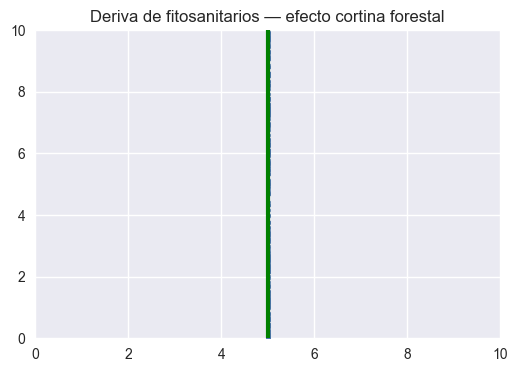

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# parámetros
n = 200
x = np.zeros(n)
y = np.random.uniform(0, 10, n)

viento = 0.15
cortina_x = 5

fig, ax = plt.subplots(figsize=(6,4))
scat = ax.scatter(x, y, s=10)
linea = ax.axvline(cortina_x, color="green", linewidth=3)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title("Deriva de fitosanitarios — efecto cortina forestal")

def update(frame):
    global x
    x = x + viento
    x = np.where(x > cortina_x, cortina_x, x)  # la cortina frena
    scat.set_offsets(np.c_[x, y])
    return scat,

ani = FuncAnimation(fig, update, frames=40)
ani.save("deriva_viento.gif", writer="pillow")
